In [69]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [5]:
#import data: Terroist Attacks from 2013 - 2016, display shape and take a peek
tf = pd.read_excel(r"C:\Users\xdere\Documents\Terrorist Attack Predictions\GTD_0617dist\gtd_13to16_0617dist.xlsx")
print tf.shape
tf.head(5)

(57196, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,201301010001,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Explosive device defused in Bannu,"" The News ...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
1,201301010002,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010002, 201301010003"
2,201301010003,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident represent a...,"""Deadly bombing leaves destruction in Kirkuk,""...","""Iraq bomb kills one,"" ITN, January 2, 2013.","""Deadly Iraq bombings near Kirkuk - video,"" St...",START Primary Collection,-9,-9,0,-9,"201301010003, 201301010002"
3,201301010004,2013,1,1,NaN,0,NaN,95,Iraq,10,...,Casualty numbers for this incident conflict ac...,"""2 cops wounded by explosion mid Kirkuk,"" Aswa...","""Iraqi forces arrest al-Qaeda terrorists,"" IRI...","""Policeman killed, another wounded in Kirkuk,""...",START Primary Collection,-9,-9,0,-9,NaN
4,201301010005,2013,1,1,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Tragedy averted: 5kg bomb defused near po...","""BDS defuses two bombs in Orangi and Steel Tow...","""Bombs defused in Orangi, Steel Town,"" The New...",START Primary Collection,0,0,0,0,NaN


## Data Preprocessing

In [39]:
#looking at Documentation we can remove all columns that are simple text interpretations of coded values
#to do this identify all columns without the suffix '_txt' -> we are left with 107 cols
cols = []
for c in tf.columns:
    if c[-4:] != '_txt':
        cols.append(c)
print cols
print len(cols)

[u'eventid', u'iyear', u'imonth', u'iday', u'approxdate', u'extended', u'resolution', u'country', u'region', u'provstate', u'city', u'latitude', u'longitude', u'specificity', u'vicinity', u'location', u'summary', u'crit1', u'crit2', u'crit3', u'doubtterr', u'alternative', u'multiple', u'success', u'suicide', u'attacktype1', u'attacktype2', u'attacktype3', u'targtype1', u'targsubtype1', u'corp1', u'target1', u'natlty1', u'targtype2', u'targsubtype2', u'corp2', u'target2', u'natlty2', u'targtype3', u'targsubtype3', u'corp3', u'target3', u'natlty3', u'gname', u'gsubname', u'gname2', u'gsubname2', u'gname3', u'gsubname3', u'motive', u'guncertain1', u'guncertain2', u'guncertain3', u'individual', u'nperps', u'nperpcap', u'claimed', u'claimmode', u'claim2', u'claimmode2', u'claim3', u'claimmode3', u'compclaim', u'weaptype1', u'weapsubtype1', u'weaptype2', u'weapsubtype2', u'weaptype3', u'weapsubtype3', u'weaptype4', u'weapsubtype4', u'weapdetail', u'nkill', u'nkillus', u'nkillter', u'nwound',

In [34]:
#features to remove, decided they were not relevant based on description in documentation
remove_lst = ['eventid', 'imonth', 'iday', 'approxdate', 'resolution', 'location' ,'summary', 'alternative', 'related', 'specificity',
             'vicinity', 'individual', 'nperps', 'nperpcap', 'motive' , 'weapdetail', 'propcomment',
             'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus',
             'ransomnote', 'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_ANY', 'nkill', 'nkillus',
             'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'propvalue']
print remove_lst

['eventid', 'imonth', 'iday', 'approxdate', 'resolution', 'location', 'summary', 'alternative', 'related', 'specificity', 'vicinity', 'individual', 'nperps', 'nperpcap', 'motive', 'weapdetail', 'propcomment', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_ANY', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte', 'propvalue']


In [40]:
#drop columns from list
for x in remove_lst:
    #print x
    cols.remove(x)
    
print cols

[u'iyear', u'extended', u'country', u'region', u'provstate', u'city', u'latitude', u'longitude', u'crit1', u'crit2', u'crit3', u'doubtterr', u'multiple', u'success', u'suicide', u'attacktype1', u'attacktype2', u'attacktype3', u'targtype1', u'targsubtype1', u'corp1', u'target1', u'natlty1', u'targtype2', u'targsubtype2', u'corp2', u'target2', u'natlty2', u'targtype3', u'targsubtype3', u'corp3', u'target3', u'natlty3', u'gname', u'gsubname', u'gname2', u'gsubname2', u'gname3', u'gsubname3', u'guncertain1', u'guncertain2', u'guncertain3', u'claimed', u'claimmode', u'claim2', u'claimmode2', u'claim3', u'claimmode3', u'compclaim', u'weaptype1', u'weapsubtype1', u'weaptype2', u'weapsubtype2', u'weaptype3', u'weapsubtype3', u'weaptype4', u'weapsubtype4', u'property', u'propextent', u'ishostkid', u'ransom', u'hostkidoutcome', u'INT_LOG', u'INT_IDEO', u'INT_MISC']


In [41]:
#setup new dataframe
tf1 = tf[cols]
tf1.shape

(57196, 65)

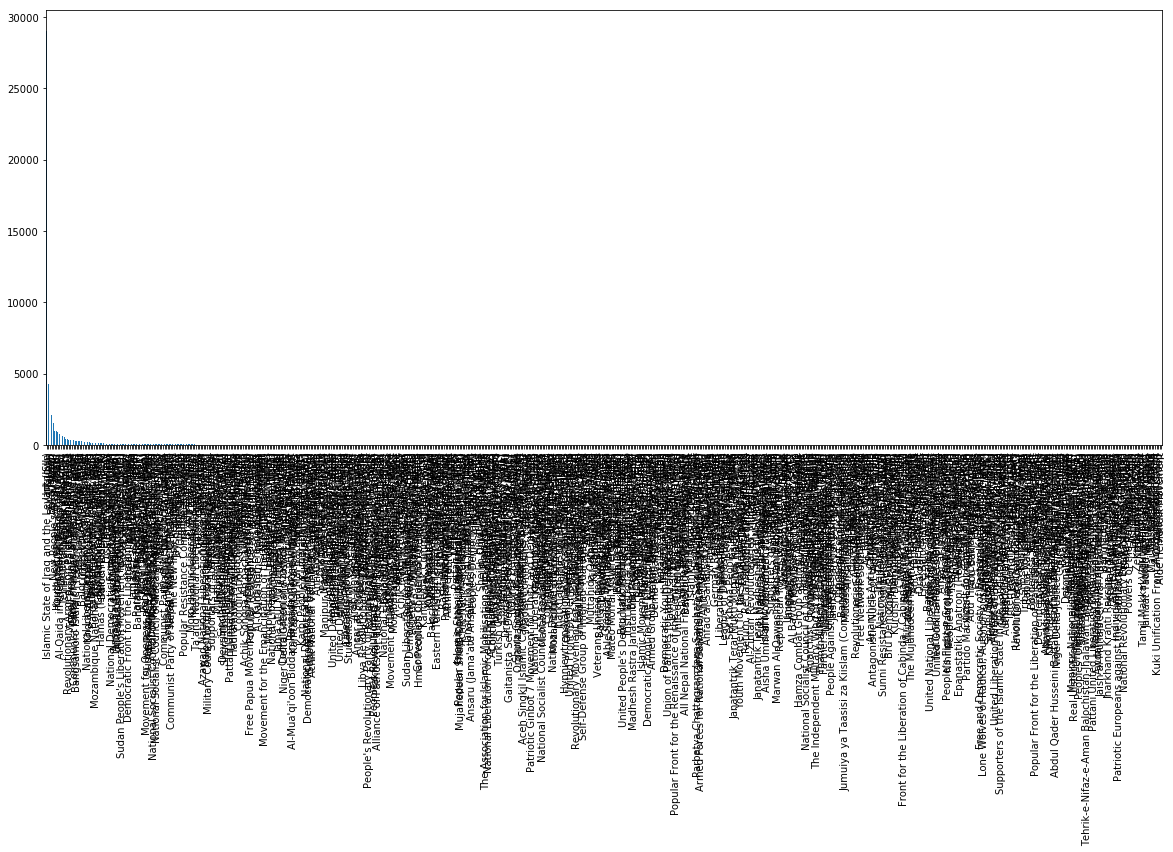

In [42]:
#initial plot of gname -> the different groups represented in this dataset
tf1.gname.value_counts().plot(kind='bar',figsize=(20,8))
plt.show()

In [43]:
#hard to see from graph so take a look numerically
tf1.gname.value_counts()

Unknown                                                              29054
Islamic State of Iraq and the Levant (ISIL)                           4287
Taliban                                                               4119
Al-Shabaab                                                            2125
Boko Haram                                                            1501
New People's Army (NPA)                                                993
Maoists                                                                960
Houthi extremists (Ansar Allah)                                        879
Kurdistan Workers' Party (PKK)                                         783
Al-Qaida in the Arabian Peninsula (AQAP)                               645
Donetsk People's Republic                                              614
Tehrik-i-Taliban Pakistan (TTP)                                        528
Fulani extremists                                                      427
Muslim extremists        

In [44]:
#clean out values where gname is unknown
tf1 = tf1.loc[tf1['gname'] != 'Unknown']
tf1.shape

(28142, 65)

In [45]:
#keep only incidents that are without a doubt terrorist attacks
tf1 = tf1.loc[tf1['doubtterr'] != 1]
tf1.shape

(21871, 65)

In [46]:
#check guncertain values -> decided to toss this since so many events were uncertain
tf.guncertain1.value_counts()

0    54638
1     2558
Name: guncertain1, dtype: int64

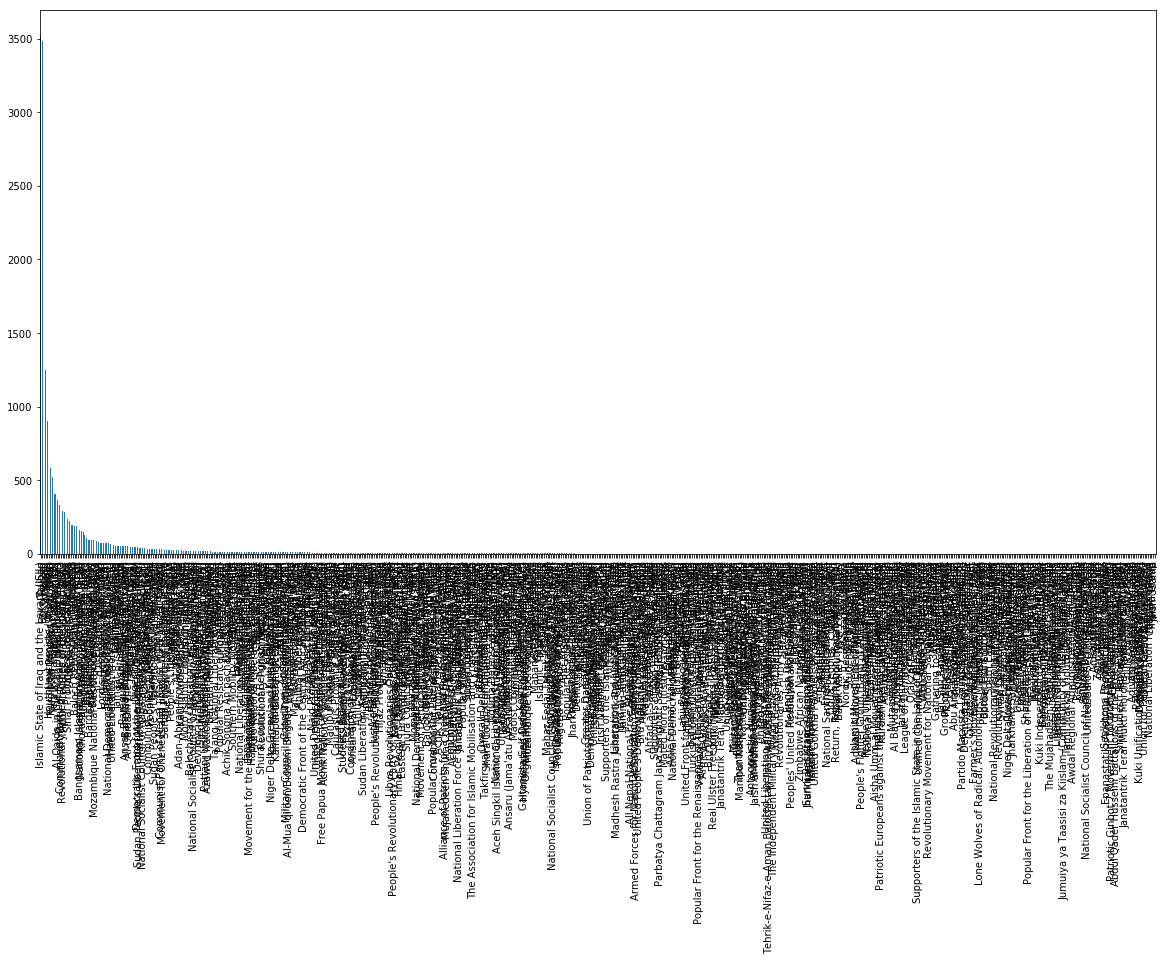

In [47]:
#plot again now that the unknown values are gone
tf1.gname.value_counts().plot(kind='bar',figsize=(20,10))
plt.show()

In [48]:
#smooth out by dropping groups where there isn't enough information -> here pick > 30 instances
tf2 = tf1.groupby('gname').filter(lambda x: len(x) > 30)
tf2.shape

(19407, 65)

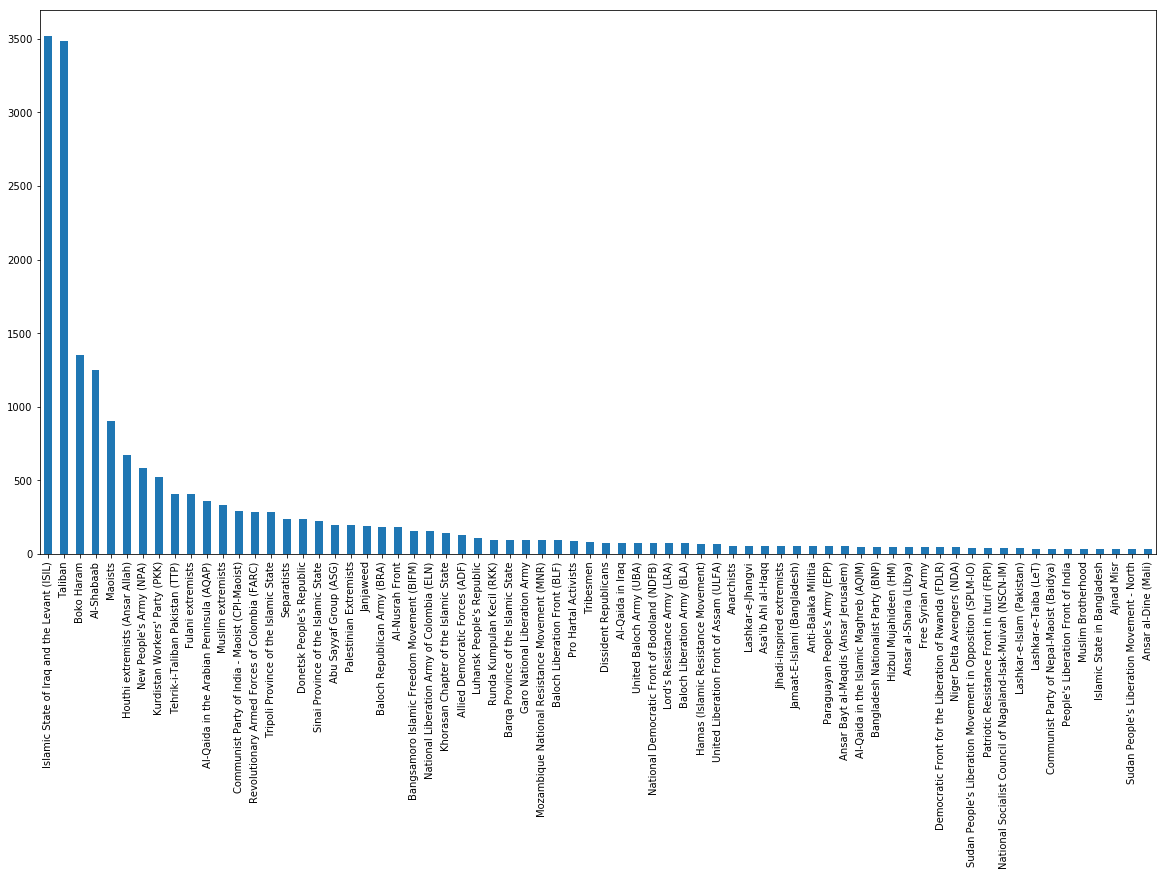

In [49]:
#another plot with many of the minor groups removed
tf2.gname.value_counts().plot(kind='bar',figsize=(20,10))
plt.show()

In [50]:
#check for NULL/NaN values -> looks like we have a lot with over 90% NULL
tf2.isnull().sum()

iyear                 0
extended              0
country               0
region                0
provstate             0
city                  0
latitude            116
longitude           116
crit1                 0
crit2                 0
crit3                 0
doubtterr             0
multiple              0
success               0
suicide               0
attacktype1           0
attacktype2       17903
attacktype3       19284
targtype1             0
targsubtype1        941
corp1                 0
target1               0
natlty1             208
targtype2         16887
targsubtype2      16887
corp2             16887
target2           16887
natlty2           16889
targtype3         19144
targsubtype3      19147
                  ...  
gname2            18894
gsubname2         19366
gname3            19342
gsubname3         19402
guncertain1           0
guncertain2       18894
guncertain3       19342
claimed               0
claimmode         13257
claim2            18894
claimmode2      

In [54]:
#determine the columns that have over 10000 NULL/NaN values and drop them
drop_df = pd.DataFrame(tf2.isnull().sum(), columns = ['count'])
print drop_df.loc[drop_df['count'] >= 10000]
print '\n'
print drop_df.loc[drop_df['count'] < 10000]

drop_cols = drop_df[drop_df['count'] > 10000].index.tolist()
print '\n'
print drop_cols

                count
attacktype2     17903
attacktype3     19284
targtype2       16887
targsubtype2    16887
corp2           16887
target2         16887
natlty2         16889
targtype3       19144
targsubtype3    19147
corp3           19144
target3         19144
natlty3         19144
gsubname        18461
gname2          18894
gsubname2       19366
gname3          19342
gsubname3       19402
guncertain2     18894
guncertain3     19342
claimmode       13257
claim2          18894
claimmode2      19276
claim3          19342
claimmode3      19388
compclaim       19276
weaptype2       16802
weapsubtype2    17145
weaptype3       18903
weapsubtype3    18930
weaptype4       19407
weapsubtype4    19407
propextent      11599
ransom          16564
hostkidoutcome  16564


              count
iyear             0
extended          0
country           0
region            0
provstate         0
city              0
latitude        116
longitude       116
crit1             0
crit2             0
crit3   

In [55]:
#drop columns with mostly NULLs
for x in drop_cols:
    cols.remove(x)
    
print cols

[u'iyear', u'extended', u'country', u'region', u'provstate', u'city', u'latitude', u'longitude', u'crit1', u'crit2', u'crit3', u'doubtterr', u'multiple', u'success', u'suicide', u'attacktype1', u'targtype1', u'targsubtype1', u'corp1', u'target1', u'natlty1', u'gname', u'guncertain1', u'claimed', u'weaptype1', u'weapsubtype1', u'property', u'ishostkid', u'INT_LOG', u'INT_IDEO', u'INT_MISC']


In [56]:
#create a new dataframe with most NULLs cleaned
tf3 = tf2[cols]
tf3.shape

(19407, 31)

In [57]:
#remove remaining rows with NULL values
tf3.dropna(inplace=True)

C:\Users\xdere\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [58]:
tf3.shape

(15831, 31)

In [59]:
#need to convert text/string data into categorical data
le = LabelEncoder()

tf3['provstate_trans'] = pd.Series(le.fit_transform(tf3.provstate), index=tf3.index)
tf3['city_trans'] = pd.Series(le.fit_transform(tf3.city), index=tf3.index)
tf3['corp1_trans'] = pd.Series(le.fit_transform(tf3.corp1), index=tf3.index)
tf3['target1_trans'] = pd.Series(le.fit_transform(tf3.target1), index=tf3.index)
tf3['target_label'] = pd.Series(le.fit_transform(tf3.gname), index=tf3.index)

C:\Users\xdere\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xdere\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xdere\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [60]:
#check if new cols are added correctly
tf3.head(5)

,iyear,extended,country,region,provstate,city,latitude,longitude,crit1,crit2,...,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,provstate_trans,city_trans,corp1_trans,target1_trans,target_label
4,2013,0,153,6,Sindh,Karachi,24.949833,66.966097,1,1,...,0,0,0,0,0,438,2676,483,78,65
11,2013,0,153,6,Khyber Pakhtunkhwa,Swabi,34.279967,72.516399,1,1,...,1,0,0,0,0,250,5181,3507,1520,65
23,2013,0,153,6,Sindh,Karachi,24.928080,67.064331,1,1,...,1,0,0,0,0,438,2676,2658,393,65
32,2013,0,45,3,Cauca,Socorro,2.243884,-77.010385,1,1,...,0,0,0,0,0,104,5082,2715,2997,58
39,2013,0,147,11,Adamawa,Song,9.824977,12.624779,1,1,...,1,0,0,0,0,5,5094,41,1408,20


In [61]:
#drop cols that are replaced and no longer of use
tf3 = tf3.drop('provstate',1)
tf3 = tf3.drop('city',1)
tf3 = tf3.drop('corp1',1)#
tf3 = tf3.drop('target1',1)
tf3 = tf3.drop('gname',1)
tf3 = tf3.drop('doubtterr', 1)
tf3 = tf3.drop('guncertain1',1)

In [62]:
tf3.shape

(15831, 29)

In [63]:
#determine our feature columns and label columns for training
feature_col= list(tf3.columns[0:28])
target_col = 'target_label'
print feature_col
print target_col

[u'iyear', u'extended', u'country', u'region', u'latitude', u'longitude', u'crit1', u'crit2', u'crit3', u'multiple', u'success', u'suicide', u'attacktype1', u'targtype1', u'targsubtype1', u'natlty1', u'claimed', u'weaptype1', u'weapsubtype1', u'property', u'ishostkid', u'INT_LOG', u'INT_IDEO', u'INT_MISC', 'provstate_trans', 'city_trans', 'corp1_trans', 'target1_trans']
target_label


In [64]:
#shuffle and split into training and test sets
X_all = tf3[feature_col]
Y_all = tf3[target_col]

x_train, x_test, y_train, y_test = train_test_split(X_all, Y_all, test_size = .25, random_state = 0)

In [65]:
#random forest classifier
clf_rf = RandomForestClassifier(random_state=0)
clf_rf.fit(x_train, y_train)

y_pred_rf = clf_rf.predict(x_test)
print clf_rf.score(x_test, y_test)
print f1_score(y_test, y_pred_rf, average='micro')

0.953511874684
0.953511874684


In [66]:
#decision tree classifier
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train,y_train)

y_pred_dt = clf_dt.predict(x_test)
print clf_dt.score(x_test, y_test)
print f1_score(y_test, y_pred_dt, average='micro')

0.939363314805
0.939363314805


In [67]:
#xgboost classifier
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(x_train,y_train)

y_pred_xgb = clf_xgb.predict(x_test)
print f1_score(y_test, y_pred_xgb, average='micro')

0.956543708944
